<a href="https://colab.research.google.com/github/vittorgustto/Challenge-Ingredion-Sprint-2/blob/main/C%C3%B3digos%20Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Lê o arquivo CSV, especificando o delimitador (se necessário)
# Tente usar ';', '\t' ou outro delimitador se ',' não funcionar
df = pd.read_csv('dados_produtividade.csv', sep=';')  # Alterado para usar ';' como delimitador

# Exibe as primeiras linhas para verificação
df.head()

,Ano,Produção (ton),Área Plantada (ha),Produtividade (kg/ha),Fonte
0,2022.0,48.795,7.055,6.916,IBGE
1,2023.0,"46.175,50","7.026,10",6.572,CONAB
2,2024.0,46.779,7.099,6.590,MAPA
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Tenta ler o arquivo assumindo que o separador é ponto e vírgula
df = pd.read_csv('dados_produtividade.csv', sep=';', encoding='utf-8', engine='python')

# Mostra as primeiras linhas
df.head(10)


,Ano,Produção (ton),Área Plantada (ha),Produtividade (kg/ha),Fonte
0,2022.0,48.795,7.055,6.916,IBGE
1,2023.0,"46.175,50","7.026,10",6.572,CONAB
2,2024.0,46.779,7.099,6.590,MAPA
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Corrige colunas numéricas com separadores de milhar (.) e decimais (,)
colunas_numericas = ['Produção (ton)', 'Área Plantada (ha)', 'Produtividade (kg/ha)']
for col in colunas_numericas:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False)  # remove pontos de milhar
    df[col] = df[col].str.replace(',', '.', regex=False)             # substitui vírgula decimal por ponto
    df[col] = pd.to_numeric(df[col], errors='coerce')                # converte para float

# Converte a coluna 'Ano' para inteiro
df['Ano'] = df['Ano'].astype('Int64')

# Remove linhas que ainda tenham NaN
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Exibe o DataFrame limpo
df.head()


,Ano,Produção (ton),Área Plantada (ha),Produtividade (kg/ha),Fonte
0,2022,48795.0,7055.0,6916.0,IBGE
1,2023,46175.5,7026.1,6572.0,CONAB
2,2024,46779.0,7099.0,659.0,MAPA


In [ ]:
# Corrigir o valor de produtividade do ano de 2024
df.loc[df['Ano'] == 2024, 'Produtividade (kg/ha)'] = 6590.0

# Verificar se foi corrigido corretamente
df


,Ano,Produção (ton),Área Plantada (ha),Produtividade (kg/ha),Fonte
0,2022,48795.0,7055.0,6916.0,IBGE
1,2023,46175.5,7026.1,6572.0,CONAB
2,2024,46779.0,7099.0,6590.0,MAPA


In [ ]:
# Seleciona as features (X) e o alvo (y)
X = df[['Ano', 'Área Plantada (ha)', 'Produção (ton)']]  # variáveis independentes
y = df['Produtividade (kg/ha)']  # variável dependente (o que queremos prever)


In [ ]:
from sklearn.model_selection import train_test_split

# Divide os dados em treino e teste (colocando test_size=0.33 já que só temos 3 linhas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Cria e treina o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Faz a previsão
y_pred = modelo.predict(X_test)

# Mostra os valores previstos e reais
import pandas as pd

comparacao = pd.DataFrame({
    'Produtividade Real': y_test.values,
    'Produtividade Prevista': y_pred
})
print(comparacao)


   Produtividade Real  Produtividade Prevista
0              6916.0             6649.107985


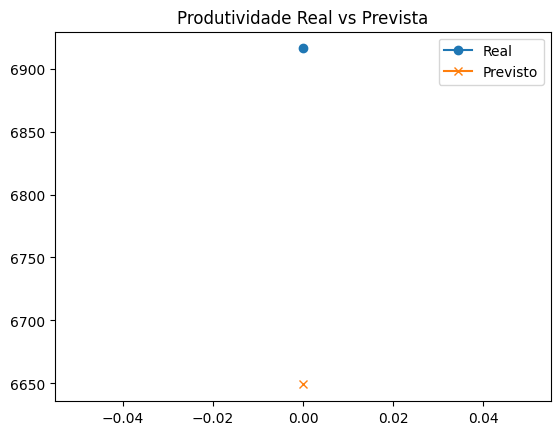

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Real', marker='o')
plt.plot(y_pred, label='Previsto', marker='x')
plt.legend()
plt.title('Produtividade Real vs Prevista')
plt.show()


In [4]:
import pandas as pd

# Tenta ler o arquivo assumindo que o separador é ponto e vírgula
df = pd.read_csv('dados_produtividade.csv', sep=';', encoding='utf-8', engine='python')

# Mostra as primeiras linhas
df.head(10)

# Remove espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Garante que as colunas numéricas estejam no tipo correto
for col in ["Produção (ton)", "Área Plantada (ha)", "Produtividade (kg/ha)"]:
    # Substitui vírgulas por pontos para decimais e remove pontos de milhar
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
# Cópia de segurança
df_derived = df.copy()

# 1. Produtividade calculada (Produção / Área)
df_derived["Produtividade Calculada"] = df_derived["Produção (ton)"] * 1000 / df_derived["Área Plantada (ha)"]

# 2. Variação percentual da produtividade ano a ano
df_derived["Variação Produtividade (%)"] = df_derived["Produtividade (kg/ha)"].pct_change() * 100

# 3. Densidade de Produção (produção por hectare, em toneladas)
df_derived["Densidade de Produção (ton/ha)"] = df_derived["Produção (ton)"] / df_derived["Área Plantada (ha)"]

# Exibir as 10 primeiras linhas
df_derived.head(10)


,Ano,Produção (ton),Área Plantada (ha),Produtividade (kg/ha),Fonte,Produtividade Calculada,Variação Produtividade (%),Densidade de Produção (ton/ha)
0,2022.0,48795.0,7055.0,6916.0,IBGE,6916.371368,NaN,6.916371
1,2023.0,46175.5,7026.1,6572.0,CONAB,6571.995844,-4.973973,6.571996
2,2024.0,46779.0,7099.0,659.0,MAPA,6589.519651,-89.972611,6.589520


In [7]:
# Treina o modelo com todos os dados
modelo = LinearRegression()
modelo.fit(X, y)

# Faz previsões com os mesmos dados
y_pred = modelo.predict(X)

# Avalia
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MAE (Erro Absoluto Médio):", round(mae, 2))
print("R² (Coeficiente de Determinação):", round(r2, 4))


MAE (Erro Absoluto Médio): 0.0
R² (Coeficiente de Determinação): 1.0


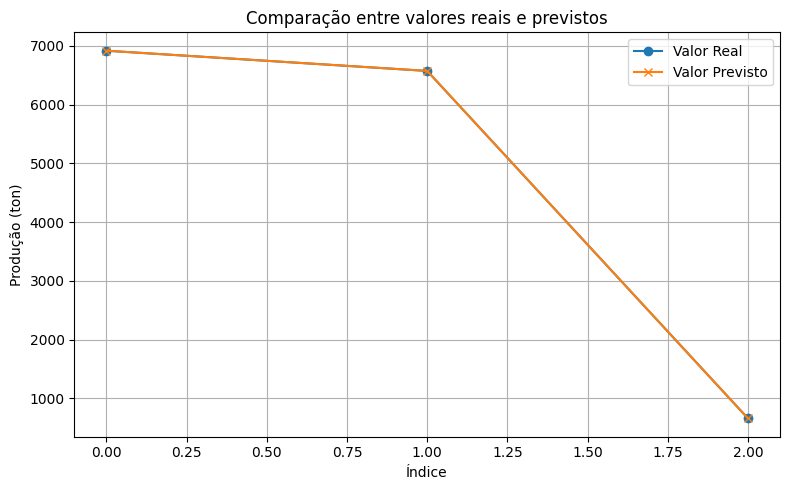

In [8]:
import matplotlib.pyplot as plt

# Compara visualmente os valores reais e os previstos
plt.figure(figsize=(8, 5))
plt.plot(y.values, label='Valor Real', marker='o')
plt.plot(y_pred, label='Valor Previsto', marker='x')
plt.title('Comparação entre valores reais e previstos')
plt.xlabel('Índice')
plt.ylabel('Produção (ton)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Previsão da Produção para 2025: 46471.44 toneladas


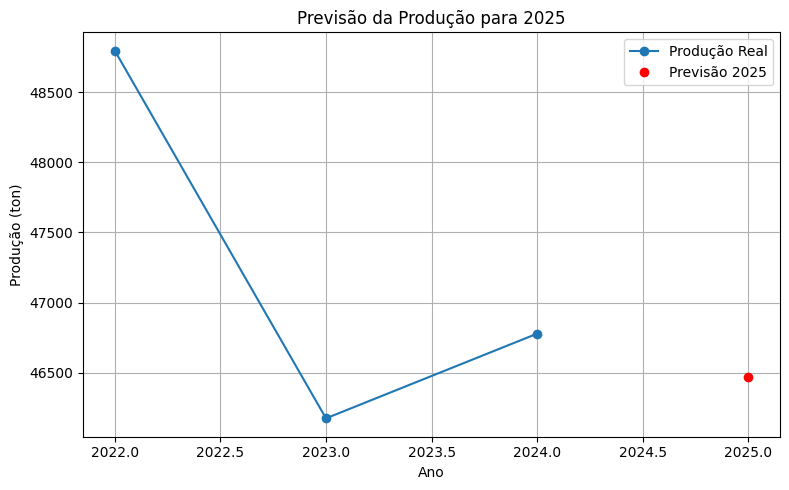

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Supondo que o df_derived já esteja limpo com variáveis derivadas
# Define X e y (alvo)
X = df_derived[['Ano', 'Área Plantada (ha)', 'Produtividade Calculada', 'Variação Produtividade (%)', 'Densidade de Produção (ton/ha)']]
y = df_derived['Produção (ton)']

# Remove rows with NaN values from X and y
X = X.dropna()
y = y[X.index]  # Keep only the y values corresponding to the rows in X

# Treina o modelo com todos os dados (não vamos dividir, já que são poucos)
modelo = LinearRegression()
modelo.fit(X, y)

# Faz a previsão para 2025 com base em médias
media_area = df_derived['Área Plantada (ha)'].mean()
media_produtividade = df_derived['Produtividade Calculada'].mean()
media_variacao = df_derived['Variação Produtividade (%)'][1:].mean()  # ignora o NaN do primeiro
media_densidade = df_derived['Densidade de Produção (ton/ha)'].mean()

dados_2025 = pd.DataFrame({
    'Ano': [2025],
    'Área Plantada (ha)': [media_area],
    'Produtividade Calculada': [media_produtividade],
    'Variação Produtividade (%)': [media_variacao],
    'Densidade de Produção (ton/ha)': [media_densidade]
})

previsao_2025 = modelo.predict(dados_2025)[0]
print(f"✅ Previsão da Produção para 2025: {previsao_2025:.2f} toneladas")

# Gráfico
anos = df_derived['Ano'].tolist() + [2025]
producoes = df_derived['Produção (ton)'].tolist() + [previsao_2025]

plt.figure(figsize=(8, 5))
plt.plot(anos[:-1], producoes[:-1], marker='o', label='Produção Real')
plt.plot(anos[-1], producoes[-1], 'ro', label='Previsão 2025')
plt.title('Previsão da Produção para 2025')
plt.xlabel('Ano')
plt.ylabel('Produção (ton)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Tenta ler o arquivo assumindo que o separador é ponto e vírgula
df = pd.read_csv('dados_produtividade.csv', sep=';', encoding='utf-8', engine='python')

# Mostra as primeiras linhas
df.head(10)

# Remove espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Garante que as colunas numéricas estejam no tipo correto
for col in ["Produção (ton)", "Área Plantada (ha)", "Produtividade (kg/ha)"]:
    # Substitui vírgulas por pontos para decimais e remove pontos de milhar
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Agora você pode usar df.copy()
df_derived = df.copy()

# Criação das colunas derivadas
df_derived['Produtividade Calculada'] = (df_derived['Produção (ton)'] * 1000) / df_derived['Área Plantada (ha)']
df_derived['Variação Produtividade (%)'] = df_derived['Produtividade Calculada'].pct_change() * 100


In [9]:
import pandas as pd

# Tenta ler o arquivo assumindo que o separador é ponto e vírgula
df = pd.read_csv('dados_produtividade.csv', sep=';', encoding='utf-8', engine='python')

# Mostra as primeiras linhas
df.head(10)

# Remove espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Garante que as colunas numéricas estejam no tipo correto
for col in ["Produção (ton)", "Área Plantada (ha)", "Produtividade (kg/ha)"]:
    # Substitui vírgulas por pontos para decimais e remove pontos de milhar
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Agora você pode usar df.copy()
df_derived = df.copy()

# Criação das colunas derivadas
df_derived['Produtividade Calculada'] = (df_derived['Produção (ton)'] * 1000) / df_derived['Área Plantada (ha)']
df_derived['Variação Produtividade (%)'] = df_derived['Produtividade Calculada'].pct_change() * 100
# Calculate and add 'Densidade de Produção (ton/ha)' column
df_derived['Densidade de Produção (ton/ha)'] = df_derived['Produção (ton)'] / df_derived['Área Plantada (ha)']

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define X e y (alvo)
X = df_derived[['Ano', 'Área Plantada (ha)', 'Produtividade Calculada', 'Variação Produtividade (%)', 'Densidade de Produção (ton/ha)']]
y = df_derived['Produção (ton)']

# Remove valores nulos
X = X.dropna()
y = y[X.index]

# Treina o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Calcula médias para simular o ano de 2025
media_area = df_derived['Área Plantada (ha)'].mean()
media_produtividade = df_derived['Produtividade Calculada'].mean()
media_variacao = df_derived['Variação Produtividade (%)'][1:].mean()  # ignora o primeiro NaN
media_densidade = df_derived['Densidade de Produção (ton/ha)'].mean()

# Dados para previsão
dados_2025 = pd.DataFrame({
    'Ano': [2025],
    'Área Plantada (ha)': [media_area],
    'Produtividade Calculada': [media_produtividade],
    'Variação Produtividade (%)': [media_variacao],
    'Densidade de Produção (ton/ha)': [media_densidade]
})

# Faz a previsão da produção
previsao_2025 = modelo.predict(dados_2025)[0]

# Cria a linha simulada de 2025
linha_2025 = {
    'Ano': 2025,
    'Produção (ton)': previsao_2025,
    'Área Plantada (ha)': media_area,
    'Produtividade (kg/ha)': np.nan,  # dado real ausente
    'Fonte': 'Simulada',
    'Produtividade Calculada': media_produtividade,
    'Variação Produtividade (%)': media_variacao,
    'Densidade de Produção (ton/ha)': media_densidade
}

# Adiciona a nova linha ao df_derived
df_derived = pd.concat([df_derived, pd.DataFrame([linha_2025])], ignore_index=True)

# Exibe o DataFrame atualizado
df_derived.tail(3)


,Ano,Produção (ton),Área Plantada (ha),Produtividade (kg/ha),Fonte,Produtividade Calculada,Variação Produtividade (%),Densidade de Produção (ton/ha)
1,2023.0,46175.500000,7026.100000,6572.0,CONAB,6571.995844,-4.979136,6.571996
2,2024.0,46779.000000,7099.000000,659.0,MAPA,6589.519651,0.266644,6.589520
3,2025.0,46438.501939,7060.033333,NaN,Simulada,6692.628954,-2.356246,6.692629


In [11]:
# Exporta o DataFrame com a previsão para um novo CSV
df_derived.to_csv('dados_com_previsao_2025.csv', index=False, encoding='utf-8', sep=';')


In [12]:
from google.colab import files
files.download('dados_com_previsao_2025.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>